# 딥러닝 시작

## 1~10까지 예측 모델 구하기
1~10까지의 데이터가 주어졌을때 답이 1에서 10이 나오도록 컴퓨터를 학습시키고, 이 학습 결과로 다른 임의의 값을 주었을때 컴퓨터가 답을 예측하는 모델을 만드는 것


In [1]:
import numpy as np
# 데이터 생성
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

1을 입력하면 1이 출력되고, 2를 입력하면 2가 출력되는 공식을 컴퓨터에게 학습시키는 것.  
머신러닝에서는 트레이닝 시킨다고 함.   
이러한 구조를 수학식으로 풀게되면 `y = ax + b` 이라는 식으로 풀 수 있게 되는데  
딥러닝, 인공신경망에서는 `h(x) = wx + b` 라고 표현함  

`a` 는 기울기, `b` 는 `y`의 절편이라고 불렀었는데, 이를 머신러닝에서는 `w`를 `weight` 가중치, `b`를 편향이라고 읽음  
이러한 인공신경망은 input 값인 x와 그의 결과인 출력값 y 를 가지고 컴퓨터에게 `train` 시키는 과정으로 반복됨  

In [2]:
# keras 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

앞서 정의한 1차 함수의 모델은 보통 '회귀모델'이라고함. 케라스로 모델을 쌓는 과정  
input_dim은 입력으로 들어가는 데이터의 차원을 의미함.  

In [3]:
model = Sequential()  # 모델을 순차적으로 구성하겠다고 선언
model.add(Dense(1, input_dim=1, activation='relu'))  # 순차적 구성 모델에 Dense 레이어를 추가하겠다는 의미

인공신경망의 layer 들이 깊게 쌓인 것을 딥러닝이라고 함.  
딥러닝을 구현하기 위해서는 신경망을 훈련시킬 x, y 값에 해당하는 데이터를 준비하고, 얼마나 많은 노드와 레이어로 모델을 구성할지 설계해야 함. 

컴퓨터가 이해할 수 있도록 model을 `compile` 해주어야 함.  
이때 인잣값으로 `loss`, `optimizer`, `metrics` 를 지정해주어야 함.  
* `loss` : 손실함수의 종류  
* `optimizer` : 최적화 함수
* `metrics` : 어떤 방식으로 모델을 측정

In [4]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')

`fit`으로 케라스의 모델을 학습함.  
이때 인잣값으로 `x`, `y`, `epochs`, `batch_size` 를 지정해줌  
* `x` : 모델에 넣을 input 데이터  
* `y` : 모델에 넣을 output 데이터  
* `epochs` : 훈련을 반복할 횟수
* `batch_size` : 배치사이즈, 신경망에 넘겨주는 데이터의 수  

아래의 코드의 경우에는 x, y 데이터를 1개씩 쪼개어 훈련을 하겠다는 의미.  
batch_size가 1일경우 1개의 배치사이즈로 총 10번의 step을 돌아야 1epoch 이 됨.   
batch_size가 2일경우 2개의 배치사이즈로 총 5번의 step을 돌아야 1epoch 이 됨.  

그래서 batch_size가 클수록 파라미터의 갱신(step)이 적어지게 되어서 학습이 빨라지지만 정확도가 떨어질 수 있음  

>1 epoch = batch_size * step(data_size / batch_size)  

In [1]:
# numpy 불러오기
import numpy as np

# 데이터 생성
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# keras 불러오기
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()  # 모델을 순차적으로 구성하겠다고 선언
model.add(Dense(1, input_dim=1, activation='relu'))  # 순차적 구성 모델에 Dense 레이어를 추가하겠다는 의미

model.summary()
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(x, y, epochs=800, batch_size=1)

# 모델 평가 
loss, acc = model.evaluate(x, y, batch_size=1)

print('loss :', loss)
print('acc :', acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
10/10 [==============================] - 0s 630us/step - loss: 4.7918 - accuracy: 0.1087
Epoch 2/800
10/10 [==============================] - 0s 522us/step - loss: 4.0962 - accuracy: 0.1390
Epoch 3/800
10/10 [==============================] - 0s 572us/step - loss: 5.8505 - accuracy: 0.0396
Epoch 4/800
10/10 [==============================] - 0s 564us/step - loss: 4.9014 - accuracy: 0.2754
Epoch 5/800
10/10 [==============================] - 0s 608us/step - loss: 3.6786 - accuracy: 0.2754
Epoch 6/800
10/10 [==============================] - 0s 683us/step - loss: 2.3076 - accuracy: 0.2754
Epoch 7/800
10/10 [==============================]

10/10 [==============================] - 0s 693us/step - loss: 0.0397 - accuracy: 0.0396
Epoch 77/800
10/10 [==============================] - 0s 647us/step - loss: 0.0473 - accuracy: 0.2754
Epoch 78/800
10/10 [==============================] - 0s 631us/step - loss: 0.0372 - accuracy: 0.0182
Epoch 79/800
10/10 [==============================] - 0s 706us/step - loss: 0.0345 - accuracy: 0.0396
Epoch 80/800
10/10 [==============================] - 0s 691us/step - loss: 0.0298 - accuracy: 0.1390
Epoch 81/800
10/10 [==============================] - 0s 680us/step - loss: 0.0353 - accuracy: 0.1087
Epoch 82/800
10/10 [==============================] - 0s 608us/step - loss: 0.0403 - accuracy: 0.0678
Epoch 83/800
10/10 [==============================] - 0s 641us/step - loss: 0.0233 - accuracy: 0.0396
Epoch 84/800
10/10 [==============================] - 0s 663us/step - loss: 0.0411 - accuracy: 0.0526
Epoch 85/800
10/10 [==============================] - 0s 661us/step - loss: 0.0222 - accuracy: 

10/10 [==============================] - 0s 630us/step - loss: 0.0160 - accuracy: 0.1087
Epoch 156/800
10/10 [==============================] - 0s 706us/step - loss: 0.0116 - accuracy: 0.0283
Epoch 157/800
10/10 [==============================] - 0s 611us/step - loss: 0.0109 - accuracy: 0.0182  
Epoch 158/800
10/10 [==============================] - 0s 712us/step - loss: 0.0153 - accuracy: 0.0678  
Epoch 159/800
10/10 [==============================] - 0s 655us/step - loss: 0.0100 - accuracy: 0.0283
Epoch 160/800
10/10 [==============================] - 0s 644us/step - loss: 0.0149 - accuracy: 0.1390
Epoch 161/800
10/10 [==============================] - 0s 675us/step - loss: 0.0171 - accuracy: 0.0860
Epoch 162/800
10/10 [==============================] - 0s 614us/step - loss: 0.0183 - accuracy: 0.0860
Epoch 163/800
10/10 [==============================] - 0s 651us/step - loss: 0.0131 - accuracy: 0.0182
Epoch 164/800
10/10 [==============================] - 0s 651us/step - loss: 0.0118

10/10 [==============================] - 0s 611us/step - loss: 0.0063 - accuracy: 0.0182  
Epoch 235/800
10/10 [==============================] - 0s 633us/step - loss: 0.0081 - accuracy: 0.0396
Epoch 236/800
10/10 [==============================] - 0s 603us/step - loss: 0.0081 - accuracy: 0.0283
Epoch 237/800
10/10 [==============================] - 0s 687us/step - loss: 0.0113 - accuracy: 0.0860
Epoch 238/800
10/10 [==============================] - 0s 613us/step - loss: 0.0056 - accuracy: 0.0678
Epoch 239/800
10/10 [==============================] - 0s 610us/step - loss: 0.0088 - accuracy: 0.0283
Epoch 240/800
10/10 [==============================] - 0s 637us/step - loss: 0.0072 - accuracy: 0.0283  
Epoch 241/800
10/10 [==============================] - 0s 603us/step - loss: 0.0076 - accuracy: 0.0678
Epoch 242/800
10/10 [==============================] - 0s 711us/step - loss: 0.0108 - accuracy: 0.1845
Epoch 243/800
10/10 [==============================] - 0s 661us/step - loss: 0.0138

10/10 [==============================] - 0s 658us/step - loss: 0.0040 - accuracy: 0.1845  
Epoch 314/800
10/10 [==============================] - 0s 624us/step - loss: 0.0047 - accuracy: 0.1845
Epoch 315/800
10/10 [==============================] - 0s 605us/step - loss: 0.0035 - accuracy: 0.0678  
Epoch 316/800
10/10 [==============================] - 0s 644us/step - loss: 0.0037 - accuracy: 0.1845
Epoch 317/800
10/10 [==============================] - 0s 614us/step - loss: 0.0020 - accuracy: 0.0283  
Epoch 318/800
10/10 [==============================] - 0s 651us/step - loss: 0.0050 - accuracy: 0.2754
Epoch 319/800
10/10 [==============================] - 0s 617us/step - loss: 0.0028 - accuracy: 0.0283
Epoch 320/800
10/10 [==============================] - 0s 638us/step - loss: 0.0048 - accuracy: 0.1390
Epoch 321/800
10/10 [==============================] - 0s 634us/step - loss: 0.0030 - accuracy: 0.0396
Epoch 322/800
10/10 [==============================] - 0s 623us/step - loss: 0.00

10/10 [==============================] - 0s 632us/step - loss: 8.3500e-04 - accuracy: 0.1087
Epoch 392/800
10/10 [==============================] - 0s 667us/step - loss: 0.0011 - accuracy: 0.0678
Epoch 393/800
10/10 [==============================] - 0s 612us/step - loss: 5.9753e-04 - accuracy: 0.0526
Epoch 394/800
10/10 [==============================] - 0s 661us/step - loss: 7.6603e-04 - accuracy: 0.0678
Epoch 395/800
10/10 [==============================] - 0s 599us/step - loss: 6.1913e-04 - accuracy: 0.0526
Epoch 396/800
10/10 [==============================] - 0s 654us/step - loss: 5.3690e-04 - accuracy: 0.0526
Epoch 397/800
10/10 [==============================] - 0s 634us/step - loss: 8.0986e-04 - accuracy: 0.1390
Epoch 398/800
10/10 [==============================] - 0s 645us/step - loss: 7.1237e-04 - accuracy: 0.0182
Epoch 399/800
10/10 [==============================] - 0s 656us/step - loss: 7.5849e-04 - accuracy: 0.0526
Epoch 400/800
10/10 [==============================] - 

10/10 [==============================] - 0s 618us/step - loss: 1.5119e-04 - accuracy: 0.0860
Epoch 468/800
10/10 [==============================] - 0s 620us/step - loss: 1.1429e-04 - accuracy: 0.0526
Epoch 469/800
10/10 [==============================] - 0s 646us/step - loss: 1.1646e-04 - accuracy: 0.0182
Epoch 470/800
10/10 [==============================] - 0s 679us/step - loss: 1.4661e-04 - accuracy: 0.0396
Epoch 471/800
10/10 [==============================] - 0s 592us/step - loss: 6.9538e-05 - accuracy: 0.0283
Epoch 472/800
10/10 [==============================] - 0s 650us/step - loss: 9.6164e-05 - accuracy: 0.0860
Epoch 473/800
10/10 [==============================] - 0s 598us/step - loss: 1.0011e-04 - accuracy: 0.0678
Epoch 474/800
10/10 [==============================] - 0s 668us/step - loss: 8.7308e-05 - accuracy: 0.0526
Epoch 475/800
10/10 [==============================] - 0s 638us/step - loss: 9.0251e-05 - accuracy: 0.1087
Epoch 476/800
10/10 [==============================

10/10 [==============================] - 0s 647us/step - loss: 6.0701e-06 - accuracy: 0.0860
Epoch 544/800
10/10 [==============================] - 0s 640us/step - loss: 9.1380e-06 - accuracy: 0.2754
Epoch 545/800
10/10 [==============================] - 0s 646us/step - loss: 4.6722e-06 - accuracy: 0.0283
Epoch 546/800
10/10 [==============================] - 0s 617us/step - loss: 3.7008e-06 - accuracy: 0.0396
Epoch 547/800
10/10 [==============================] - 0s 697us/step - loss: 6.1633e-06 - accuracy: 0.1845
Epoch 548/800
10/10 [==============================] - 0s 608us/step - loss: 3.7250e-06 - accuracy: 0.0283
Epoch 549/800
10/10 [==============================] - 0s 662us/step - loss: 3.5271e-06 - accuracy: 0.0526
Epoch 550/800
10/10 [==============================] - 0s 636us/step - loss: 6.4666e-06 - accuracy: 0.2754
Epoch 551/800
10/10 [==============================] - 0s 621us/step - loss: 2.5983e-06 - accuracy: 0.0396
Epoch 552/800
10/10 [==============================

10/10 [==============================] - 0s 643us/step - loss: 6.1911e-08 - accuracy: 0.0526
Epoch 620/800
10/10 [==============================] - 0s 582us/step - loss: 8.0067e-08 - accuracy: 0.0860
Epoch 621/800
10/10 [==============================] - 0s 647us/step - loss: 7.8433e-08 - accuracy: 0.0860
Epoch 622/800
10/10 [==============================] - 0s 607us/step - loss: 7.4911e-08 - accuracy: 0.1845
Epoch 623/800
10/10 [==============================] - 0s 658us/step - loss: 6.6656e-08 - accuracy: 0.0678
Epoch 624/800
10/10 [==============================] - 0s 597us/step - loss: 8.2506e-08 - accuracy: 0.2754
Epoch 625/800
10/10 [==============================] - 0s 653us/step - loss: 6.4093e-08 - accuracy: 0.0860
Epoch 626/800
10/10 [==============================] - 0s 646us/step - loss: 6.3534e-08 - accuracy: 0.2754
Epoch 627/800
10/10 [==============================] - 0s 607us/step - loss: 3.9134e-08 - accuracy: 0.0678
Epoch 628/800
10/10 [==============================

10/10 [==============================] - 0s 584us/step - loss: 1.9678e-10 - accuracy: 0.2754
Epoch 696/800
10/10 [==============================] - 0s 689us/step - loss: 1.5043e-10 - accuracy: 0.2754
Epoch 697/800
10/10 [==============================] - 0s 645us/step - loss: 1.3680e-10 - accuracy: 0.0860
Epoch 698/800
10/10 [==============================] - 0s 629us/step - loss: 7.5837e-11 - accuracy: 0.0526
Epoch 699/800
10/10 [==============================] - 0s 638us/step - loss: 5.8005e-11 - accuracy: 0.1087
Epoch 700/800
10/10 [==============================] - 0s 590us/step - loss: 1.1931e-10 - accuracy: 0.2754
Epoch 701/800
10/10 [==============================] - 0s 671us/step - loss: 5.8111e-11 - accuracy: 0.0283
Epoch 702/800
10/10 [==============================] - 0s 588us/step - loss: 4.7617e-11 - accuracy: 0.0526
Epoch 703/800
10/10 [==============================] - 0s 624us/step - loss: 6.3115e-11 - accuracy: 0.1845
Epoch 704/800
10/10 [==============================

10/10 [==============================] - 0s 604us/step - loss: 6.0135e-13 - accuracy: 0.0283
Epoch 772/800
10/10 [==============================] - 0s 643us/step - loss: 8.3144e-13 - accuracy: 0.0396
Epoch 773/800
10/10 [==============================] - 0s 607us/step - loss: 1.8125e-12 - accuracy: 0.1845
Epoch 774/800
10/10 [==============================] - 0s 660us/step - loss: 6.8312e-13 - accuracy: 0.0182
Epoch 775/800
10/10 [==============================] - 0s 604us/step - loss: 1.3744e-12 - accuracy: 0.0283
Epoch 776/800
10/10 [==============================] - 0s 618us/step - loss: 1.2618e-12 - accuracy: 0.1390
Epoch 777/800
10/10 [==============================] - 0s 645us/step - loss: 9.1153e-13 - accuracy: 0.0678
Epoch 778/800
10/10 [==============================] - 0s 601us/step - loss: 6.5805e-13 - accuracy: 0.0526
Epoch 779/800
10/10 [==============================] - 0s 640us/step - loss: 1.3858e-12 - accuracy: 0.0678
Epoch 780/800
10/10 [==============================

evalute는 최종 결과에 대한 평가  
evalute의 반환은 loss, acc가 반환되고, loss 는 작을 수록 학습이 잘 진행되고 있다는 뜻이고, acc 는 1에 가까울 수록 정확하다는 의미

acc, loss 시각화

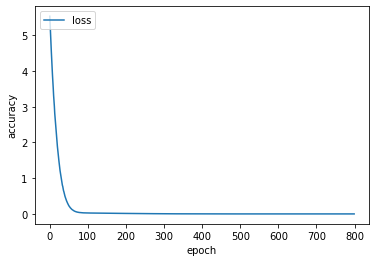

In [2]:
import matplotlib.pyplot as plt

loss = history.history['loss']
x_len = np.arange(len(loss))
plt.plot(x_len, loss)

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

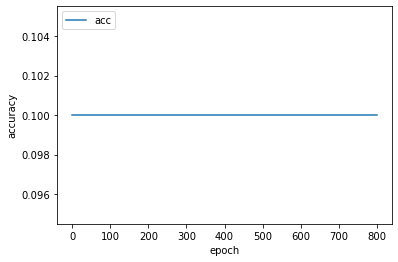

In [3]:
accuracy = history.history['accuracy']
x_len = np.arange(len(loss))
plt.plot(x_len, accuracy)

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
plt.show()

acc는 낮게 나왔지만, 예측은 잘하는 모습.. 뭐가 문제일까 

In [4]:
model.predict([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array([[1.0000013],
       [2.000001 ],
       [3.0000007],
       [4.0000005],
       [5.       ],
       [5.9999995],
       [6.9999995],
       [7.999999 ],
       [8.999999 ],
       [9.999999 ]], dtype=float32)

## 101~110까지 예측 모델 구하기
데이터를 훈련시킬 데이터와 테스트할 데이터를 분리함.  
훈련에 사용할 데이터는 1~10 데이터를 사용함. 



In [5]:
# numpy 불러오기
import numpy as np

# train 데이터 생성
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# test 데이터 생성
x_test = np.array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])
y_test = np.array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

두번째 모델은 layer가 추가 되었음. Dense()안에 있는 숫자를 노드를 의미함.  
따라서 입력으로 부터 5개의 노드를 거치는 레이어를 추가한 것임.  
다시 5개의 노드는 3개를 노드를 가지는 레이어를 거치고,  
마지막에 1개의 노드를 가지는 레이어를 거쳐 출력값이 나오게 됨.  

모델을 한눈에 보려면 model.summary() 메서드를 사용하면 됨.  

In [6]:
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


param 는 parameter의 약자임. 파라미터는 각 노드간의 가중치와 노드마다의 편향으로 이루어져 있음  
그러므로 첫번째 레이어에는 1->5 이므로 5개의 가중치와 5개의 편향이 더해지게 되어 10개의 파라미터,    
두번째 레이어는 5->3 15개의 가중치와 3개의 편향이 더해져 18개의 파라미터,  
마지막 레이어는 3->1 3개의 가중치와 1개의 편향이 더해져 4개의 파라미터가 생성되게 됨.  

In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

`fit` 에서 `validation_data`가 추가되었음.  이는 훈련데이터와 검증데이터를 나눠서 학습과 평가를 하기 위해서임  
`validation_data` 에는 원래 훈련데이터와는 다른 평가용 데이터를 입력하면 됨.

In [18]:
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=500, batch_size=1, validation_data=(x_test, y_test))
loss = model.evaluate(x_test, y_test, batch_size=1)

print('loss : ', loss)

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 11.6867 - val_loss: 2047.9916
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 3.3977 - val_loss: 1614.8258
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 5.1346 - val_loss: 1145.9943
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 2.6706 - val_loss: 817.9100
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8136 - val_loss: 557.9669
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8806 - val_loss: 357.0435
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0583 - val_loss: 225.0847
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 145.0349
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1503 - val_loss: 99.9754
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1051 - val_

10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 2.3158
Epoch 83/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 2.0756
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 1.9757
Epoch 85/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 2.1356
Epoch 86/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 1.8358
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 1.6664
Epoch 88/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 1.5350
Epoch 89/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 1.6086
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 1.5536
Epoch 91/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 1.4248
Epoch 92/500


Epoch 161/500
10/10 [==============================] - 0s 4ms/step - loss: 7.5670e-06 - val_loss: 0.0070
Epoch 162/500
10/10 [==============================] - 0s 4ms/step - loss: 5.2258e-06 - val_loss: 0.0069
Epoch 163/500
10/10 [==============================] - 0s 4ms/step - loss: 5.8581e-06 - val_loss: 0.0068
Epoch 164/500
10/10 [==============================] - 0s 4ms/step - loss: 3.7051e-06 - val_loss: 0.0057
Epoch 165/500
10/10 [==============================] - 0s 4ms/step - loss: 5.3404e-06 - val_loss: 0.0047
Epoch 166/500
10/10 [==============================] - 0s 4ms/step - loss: 6.7385e-06 - val_loss: 0.0044
Epoch 167/500
10/10 [==============================] - 0s 4ms/step - loss: 7.8105e-06 - val_loss: 0.0041
Epoch 168/500
10/10 [==============================] - 0s 4ms/step - loss: 4.4332e-06 - val_loss: 0.0037
Epoch 169/500
10/10 [==============================] - 0s 4ms/step - loss: 3.7401e-06 - val_loss: 0.0035
Epoch 170/500
10/10 [==============================] - 

Epoch 237/500
10/10 [==============================] - 0s 4ms/step - loss: 9.9635e-10 - val_loss: 7.7980e-07
Epoch 238/500
10/10 [==============================] - 0s 4ms/step - loss: 5.8170e-10 - val_loss: 5.9535e-07
Epoch 239/500
10/10 [==============================] - 0s 4ms/step - loss: 8.9695e-10 - val_loss: 6.0235e-07
Epoch 240/500
10/10 [==============================] - 0s 4ms/step - loss: 5.7032e-10 - val_loss: 5.7674e-07
Epoch 241/500
10/10 [==============================] - 0s 4ms/step - loss: 5.7220e-10 - val_loss: 4.9518e-07
Epoch 242/500
10/10 [==============================] - 0s 4ms/step - loss: 2.8661e-10 - val_loss: 2.8553e-07
Epoch 243/500
10/10 [==============================] - 0s 4ms/step - loss: 7.1692e-10 - val_loss: 3.1042e-07
Epoch 244/500
10/10 [==============================] - 0s 4ms/step - loss: 2.9477e-10 - val_loss: 2.9696e-07
Epoch 245/500
10/10 [==============================] - 0s 4ms/step - loss: 4.1336e-10 - val_loss: 3.0202e-07
Epoch 246/500
10/10

10/10 [==============================] - 0s 4ms/step - loss: 5.7963e-13 - val_loss: 1.2573e-09
Epoch 313/500
10/10 [==============================] - 0s 4ms/step - loss: 7.1317e-13 - val_loss: 1.2573e-09
Epoch 314/500
10/10 [==============================] - 0s 4ms/step - loss: 4.6134e-13 - val_loss: 1.2573e-09
Epoch 315/500
10/10 [==============================] - 0s 4ms/step - loss: 3.8714e-13 - val_loss: 1.2573e-09
Epoch 316/500
10/10 [==============================] - 0s 4ms/step - loss: 8.5490e-13 - val_loss: 1.1933e-09
Epoch 317/500
10/10 [==============================] - 0s 4ms/step - loss: 5.6551e-13 - val_loss: 1.1409e-09
Epoch 318/500
10/10 [==============================] - 0s 4ms/step - loss: 3.9866e-13 - val_loss: 1.1409e-09
Epoch 319/500
10/10 [==============================] - 0s 4ms/step - loss: 6.6026e-13 - val_loss: 1.0885e-09
Epoch 320/500
10/10 [==============================] - 0s 4ms/step - loss: 4.2690e-13 - val_loss: 9.9535e-10
Epoch 321/500
10/10 [============

10/10 [==============================] - 0s 4ms/step - loss: 5.0580e-13 - val_loss: 1.2806e-10
Epoch 388/500
10/10 [==============================] - 0s 4ms/step - loss: 2.9042e-13 - val_loss: 1.2224e-10
Epoch 389/500
10/10 [==============================] - 0s 4ms/step - loss: 4.5808e-13 - val_loss: 1.0477e-10
Epoch 390/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8526e-13 - val_loss: 9.8953e-11
Epoch 391/500
10/10 [==============================] - 0s 4ms/step - loss: 1.2967e-13 - val_loss: 9.8953e-11
Epoch 392/500
10/10 [==============================] - 0s 4ms/step - loss: 9.2992e-14 - val_loss: 9.8953e-11
Epoch 393/500
10/10 [==============================] - 0s 4ms/step - loss: 2.8009e-13 - val_loss: 9.8953e-11
Epoch 394/500
10/10 [==============================] - 0s 4ms/step - loss: 1.4401e-13 - val_loss: 7.5670e-11
Epoch 395/500
10/10 [==============================] - 0s 4ms/step - loss: 8.8935e-14 - val_loss: 7.5670e-11
Epoch 396/500
10/10 [============

10/10 [==============================] - 0s 4ms/step - loss: 1.3056e-13 - val_loss: 2.3283e-11
Epoch 463/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0127e-13 - val_loss: 2.3283e-11
Epoch 464/500
10/10 [==============================] - 0s 4ms/step - loss: 7.7394e-14 - val_loss: 2.3283e-11
Epoch 465/500
10/10 [==============================] - 0s 4ms/step - loss: 1.5265e-13 - val_loss: 2.3283e-11
Epoch 466/500
10/10 [==============================] - 0s 4ms/step - loss: 7.6037e-14 - val_loss: 2.3283e-11
Epoch 467/500
10/10 [==============================] - 0s 4ms/step - loss: 7.6883e-14 - val_loss: 2.3283e-11
Epoch 468/500
10/10 [==============================] - 0s 4ms/step - loss: 7.6696e-14 - val_loss: 4.6566e-11
Epoch 469/500
10/10 [==============================] - 0s 4ms/step - loss: 8.3568e-14 - val_loss: 4.6566e-11
Epoch 470/500
10/10 [==============================] - 0s 4ms/step - loss: 1.7043e-13 - val_loss: 4.6566e-11
Epoch 471/500
10/10 [============

In [20]:
output = model.predict(x_test)
print('결과물 : \n', output)

결과물 : 
 [[101.     ]
 [102.00001]
 [103.00001]
 [104.     ]
 [105.00001]
 [106.     ]
 [107.     ]
 [108.00001]
 [109.00001]
 [110.00001]]


## 딥러닝 케라스 기본구조

1. 데이터 준비
2. 모델 구성
3. 컴파일, 훈련
4. 평가 예측